<a href="https://colab.research.google.com/github/raisaksh1/Machine-Learning/blob/main/Normalization_Technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/wine_data.csv', header = 1, usecols = [0,1,2])
df.columns = ['Class Labels', 'Alcohol', 'Malic Acid']

In [4]:
df

,Class Labels,Alcohol,Malic Acid
0,1,13.16,2.36
1,1,14.37,1.95
2,1,13.24,2.59
3,1,14.20,1.76
4,1,14.39,1.87
...,...,...,...
171,3,13.71,5.65
172,3,13.40,3.91
173,3,13.27,4.28
174,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

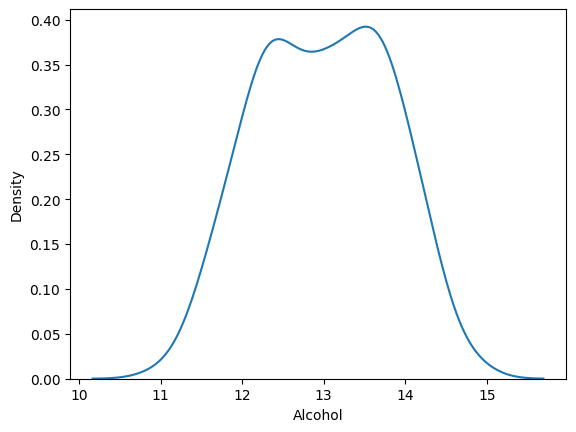

In [5]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic Acid', ylabel='Density'>

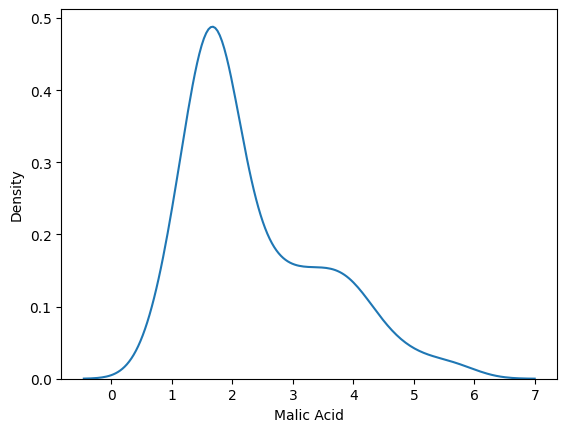

In [6]:
sns.kdeplot(df['Malic Acid'])

In [32]:
color_dict = {1:'red', 2:'blue',  3:'green'}
sns.scatterplot(df['Alcohol'], df['Malic Acid'], palette = color_dict)

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Class Labels', axis = 1), df['Class Labels'], test_size = 0.3, random_state = 0)

X_train.shape, X_test.shape

((123, 2), (53, 2))

In [27]:
from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler()

Scaler.fit(X_train)

X_train_scaled = Scaler.transform(X_train)
X_test_scaled = Scaler.transform(X_test)

In [28]:
X_train_scaled = pd.DataFrame(X_train_scaled,  columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [29]:
np.round(X_train.describe(), 1)

,Alcohol,Malic Acid
count,123.0,123.0
mean,13.0,2.3
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.8
75%,13.6,3.1
max,14.8,5.8


In [30]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic Acid
count,123.0,123.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.1
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


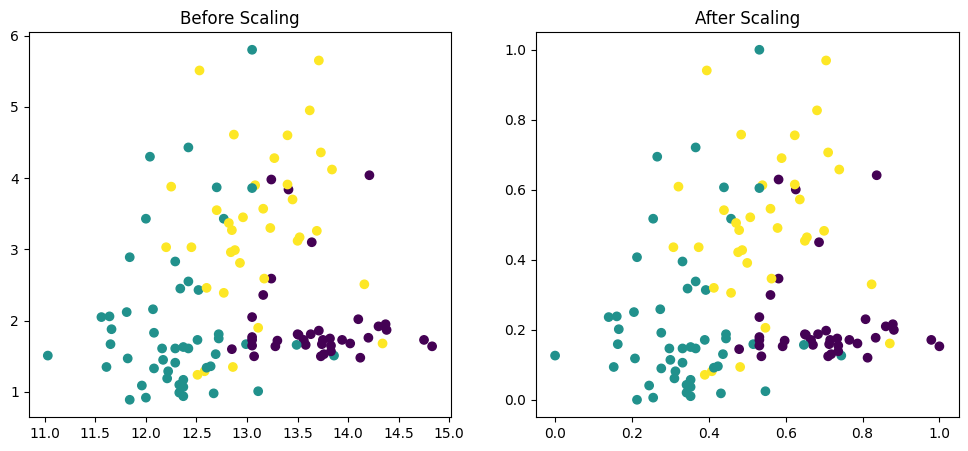

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(12,5))

ax1.scatter(X_train['Alcohol'], X_train['Malic Acid'], c = Y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic Acid'], c = Y_train)
ax2.set_title("After Scaling")
plt.show()

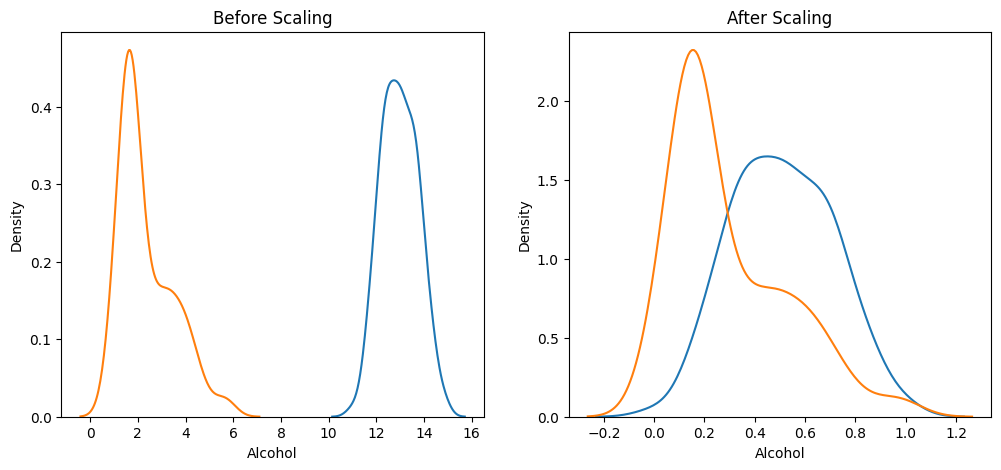

In [35]:
fig , (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax = ax1)
sns.kdeplot(X_train['Malic Acid'], ax = ax1)

#after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax = ax2)
sns.kdeplot(X_train_scaled['Malic Acid'], ax = ax2)
plt.show()